In [1]:
import random
import timeit
import time

In [2]:
def create_sequence_of_interest(length_of_seq):
    """
    create a sequence of given length containing integer values, either 1 or 2

    this is intended to represent the outcome of a sequence of coin flips
    """
    list_of_flips=[]
    for this_flip in range(length_of_seq):
        list_of_flips.append(random.randint(1, 2))
    return tuple(list_of_flips)

In [3]:
def find_match(sequence_of_interest):
    """
    given a sequence of integers (either 1 or 2), flip a coin until that sequence is found
    """
    start_time = timeit.default_timer()
    number_of_coin_flips=0
    this_run=[]  # store the results of the random coin flips in a list
    while True:
        coin = random.randint(1, 2) # random coin flip results in 1 or 2
        number_of_coin_flips+=1
        this_run.append(coin)       # add coin flip result to list
        if (len(this_run)==len(sequence_of_interest)):
            found_match=False
            for flip_indx in range(len(sequence_of_interest)):
                if (sequence_of_interest[flip_indx] == this_run[flip_indx]):
                    found_match=True
                else: # patterns don't match
                    found_match=False
                    this_run=[]
                    break
            if (found_match==True):
                #print(this_run)
                break

    #print("number of coin flips:",number_of_coin_flips)
    elapsed = timeit.default_timer() - start_time
    #print(str(elapsed) + " seconds")
    return elapsed, number_of_coin_flips

In [4]:
number_of_tries_per_loop=1000
start_length=3
end_length=10

In [5]:
list_of_result_dicts=[]
start_time=time.time()
for length_of_seq in range(3,10):
    for this_try in range(number_of_tries_per_loop):
        sequence_of_interest = create_sequence_of_interest(length_of_seq)
#        print(sequence_of_interest)

        elapsed, number_of_coin_flips = find_match(sequence_of_interest)
#        print(elapsed,"seconds")
#        print(number_of_coin_flips)
        this_result={}
        this_result['elapsed time in seconds'] = elapsed
        this_result['number of flips'] = number_of_coin_flips
        this_result['sequence length'] = length_of_seq
        list_of_result_dicts.append(this_result)
        
print('elapsed:',time.time()-start_time,'seconds')

elapsed: 31.750388145446777 seconds


In [6]:
import pandas
pandas.__version__

'0.23.4'

In [7]:
results_df = pandas.DataFrame(list_of_result_dicts)
results_df.head(10)

,elapsed time in seconds,number of flips,sequence length
0,0.000029,3,3
1,0.000104,6,3
2,0.000232,51,3
3,0.000076,18,3
4,0.000288,39,3
5,0.000154,18,3
6,0.000104,6,3
7,0.000058,6,3
8,0.000073,9,3
9,0.000218,39,3


In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.0.2'

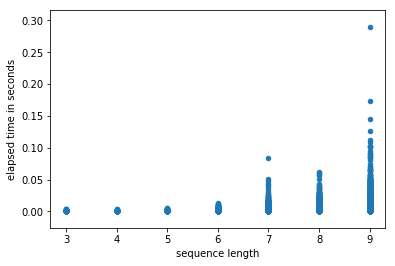

In [9]:
results_df.plot.scatter(x='sequence length',y='elapsed time in seconds')
plt.show()

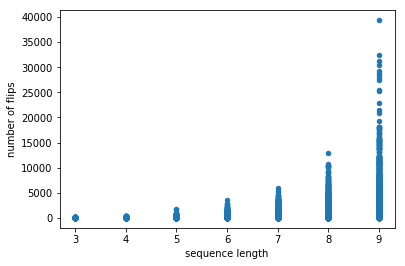

In [10]:
results_df.plot.scatter(x='sequence length',y='number of flips')
plt.show()

In [11]:
results_df.groupby('sequence length').describe()

elapsed time in seconds                                \
                                  count      mean       std       min   
sequence length                                                         
3                                1000.0  0.000187  0.000324  0.000023   
4                                1000.0  0.000265  0.000291  0.000026   
5                                1000.0  0.000596  0.000597  0.000028   
6                                1000.0  0.001533  0.001682  0.000032   
7                                1000.0  0.004450  0.005911  0.000055   
8                                1000.0  0.007240  0.007736  0.000040   
9                                1000.0  0.017164  0.020413  0.000040   

                                                        number of flips  \
                      25%       50%       75%       max           count   
sequence length                                                           
3                0.000056  0.000101  0.000202  0.004517          1000.0   
4                0.000081  0.000187  0.000342  0.003032          1000.0   
5                0.000188  0.000399  0.000825  0.005304          1000.0   
6                0.000402  0.000979  0.001983  0.012420          1000.0   
7                0.001001  0.002622  0.005729  0.083672          1000.0   
8                0.002012  0.004852  0.010031  0.061173          1000.0   
9                0.005022  0.011146  0.022820  0.290053          1000.0   

                                                                               
                     mean          std  min     25%     50%      75%      max  
sequence length                                                                
3                  23.574    21.841327  3.0     9.0    18.0    33.00    156.0  
4                  62.400    60.704440  4.0    16.0    44.0    88.00    448.0  
5                 159.270   157.219863  5.0    50.0   115.0   225.00   1720.0  
6                 399.774   413.343012  6.0   114.0   276.0   541.50   3510.0  
7                 935.095   913.704416  7.0   259.0   644.0  1260.00   5915.0  
8                1950.208  1913.453535  8.0   560.0  1336.0  2600.00  12912.0  
9                4770.855  4868.653124  9.0  1413.0  3226.5  6338.25  39339.0

We can add error bars to the plot for each sequence length

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html

https://matplotlib.org/gallery/statistics/errorbar_features.html

or use a violin plot

In [12]:
import seaborn
seaborn.__version__

'0.9.0'

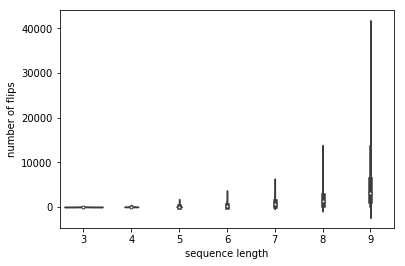

In [13]:
ax = seaborn.violinplot(x="sequence length", 
                        y="number of flips", 
                        data=results_df,
                        showmeans=True,
                        showextrema=True,
                        showmedians=True)